[Home](Home.ipynb)

# Tabular Python (numpy + pandas)

Although numpy's n-dimensional arrays may have as many axes as we like, we're typically working with rows and columns, like a spreadsheet.  We call this a two dimensional array.

Numpy does the number crunching with respect to these arrays.  Pandas provides a DataFrame much like a picture frame around a canvas.  You get to label and reorder rows and columns, will mixing columns (called Series type objects) of different types.

In [4]:
import numpy as np
import pandas as pd

In [20]:
"numpy ver: {}; pandas ver: {}".format(np.__version__, pd.__version__)

'numpy ver: 1.17.3; pandas ver: 1.2.3'

Python's native range type is all fine and good when you want consecutive integers. Thanks to list comprehension syntax, defining floating point inputs at some constant interval is likewise doable.

In [3]:
[i/10 for i in range(1, 11)] # range has no native floating point ability

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

However, numpy introduces two new domain-makers that make life easier yet, in that both return np.ndarray type objects, equipped with all manner of methods.

```arange``` gets a start and up-to-but-not-including argument, followed by the discrete interval between adjacent values.  

In [4]:
np.arange(0.1, 1.1, 0.1) # start, up to, interval

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

```linspace``` is similar, but a third argument specifies how many points should appear between start and stop values.  The stop value is inclusive in this case.

In [5]:
np.linspace(0.1, 1.0, 10) # start, stop, how many

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

### Parabolas

The cells below may be used as a worksheet.  Try different polynomials with varied domains, tabulating and plotting the results.

In [21]:
x = np.arange(-3, 3.1, 0.1)

In [22]:
y = x**2 - 1

A DataFrame may be initialized in several ways, the most straightforward being a shown below, with a dict.  The dict keys are column headers, whereas the values should be numpy arrays with the corresponding column data.

In [23]:
points = pd.DataFrame({"X":x, "Y":y})

Notice how pretty the formatting, with middle rows left out.

In [24]:
points

,X,Y
0,-3.0,8.00
1,-2.9,7.41
2,-2.8,6.84
3,-2.7,6.29
4,-2.6,5.76
...,...,...
56,2.6,5.76
57,2.7,6.29
58,2.8,6.84
59,2.9,7.41


In [27]:
points.tail(10)

,X,Y
51,2.1,3.41
52,2.2,3.84
53,2.3,4.29
54,2.4,4.76
55,2.5,5.25
56,2.6,5.76
57,2.7,6.29
58,2.8,6.84
59,2.9,7.41
60,3.0,8.00


Once we have a DataFrame, we may invoke its plot method directly, with axis labels and title for named arguments.

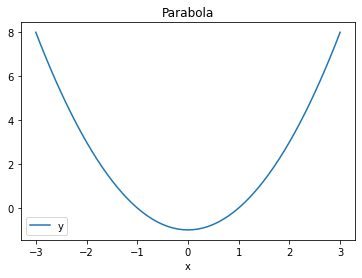

In [11]:
points.plot(x="x", y="y", title="Parabola");

# pandas & SQL

Where else have we seen tabular data?  In spreadsheets, certainly.  And in SQL databases, where we have CRUD powers (Create, Retrieve, Update, Delete). We want all these powers, and many more, over our DataFrames as well.

Remember [our context manager studies](DatabaseFun.ipynb)?  That's where [context1](context1.py) gets more context.

In [2]:
from context1 import DB

In [7]:
with DB("roller_coasters.db") as db:
    sql_query = pd.read_sql_query("SELECT Name, Park, State FROM Coasters WHERE speed >= 80 ORDER BY State", db.conn)
    coasters = pd.DataFrame(sql_query)
    
coasters.head(20)

,Name,Park,State
0,Superman The Escape,Six Flags Magic Mountain,California
1,Goliath,Six Flags Magic Mountain,California
2,Xcelerator,Knott's Berry Farm,California
3,Tower of Terror,Dreamworld,Coomera
4,Fujiyama,Fuji-Q Highlands,FujiYoshida-shi
5,Steel Dragon 2000,Nagashima Spa Land,Nagashima
6,Desperado,Buffalo Bill's Resort & Casino,Nevada
7,Nitro,Six Flags Great Adventure,New Jersey
8,Top Thrill Dragster,Cedar Point,Ohio
9,Millennium Force,Cedar Point,Ohio


In [17]:
with DB("airports.db") as db:
    sql_query = pd.read_sql_query("SELECT * FROM Airports", db.conn)
    airports = pd.DataFrame(sql_query)
    
airports.head()

,iata,iso,name,continent,type,lat,lon,size,status
0,UTK,MH,Utirik Airport,OC,airport,11.233333,169.86667,small,1
1,FIV,US,Five Finger CG Heliport,NA,heliport,NaN,NaN,None,1
2,FAK,US,False Island Seaplane Base,NA,seaplanes,NaN,NaN,None,1
3,BWS,US,Blaine Municipal Airport,NA,closed,NaN,NaN,None,0
4,WKK,US,Aleknagik / New Airport,NA,airport,59.277780,-158.61111,medium,1


For further reading:

* [Help with DELETE on Quora](https://qr.ae/pGNaYy)